Use Autoencoder to implement anomaly detection. Build the model by using:
a. Import required libraries
b. Upload / access the dataset
c. Encoder converts it into latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('/content/ecg_autoencoder_dataset.csv',header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [9]:
x = df.drop(140,axis=1)
y = df[140]

In [16]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
idx = y_train[y_train == 1].index
x_train = x_train.loc[idx]


In [20]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
encoder = Sequential([
    Dense(64,activation='relu',input_shape=(140,)),
    Dropout(0.1),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(16,activation='relu'),
    Dropout(0.1),
    Dense(8,activation='relu')
])

decoder = Sequential([
    Dense(16,activation='relu',input_shape=(8,)),
    Dropout(0.1),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(64,activation='relu'),
    Dropout(0.1),
    Dense(140,activation='sigmoid')
])

autoencoder = Sequential([
    encoder,
    decoder
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
autoencoder.compile(loss='msle',optimizer='adam',metrics=['mae'])

In [37]:
h = autoencoder.fit(x_train_scaled,x_train_scaled,epochs=20,batch_size=512,validation_data=(x_test_scaled,x_test_scaled))

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0044 - mae: 0.0703 - val_loss: 0.0092 - val_mae: 0.0977
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0043 - mae: 0.0696 - val_loss: 0.0092 - val_mae: 0.0980
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mae: 0.0690 - val_loss: 0.0092 - val_mae: 0.0982
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0042 - mae: 0.0683 - val_loss: 0.0091 - val_mae: 0.0972
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042 - mae: 0.0678 - val_loss: 0.0091 - val_mae: 0.0976
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0042 - mae: 0.0678 - val_loss: 0.0090 - val_mae: 0.0971
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0042 - mae: 0.0680 - val_loss: 0.0090 - val_mae: 0.0967
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0041 - mae: 0.0670 - val_loss: 0.0090 - val_mae: 0.0965
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0040 - mae: 0.0667 - 

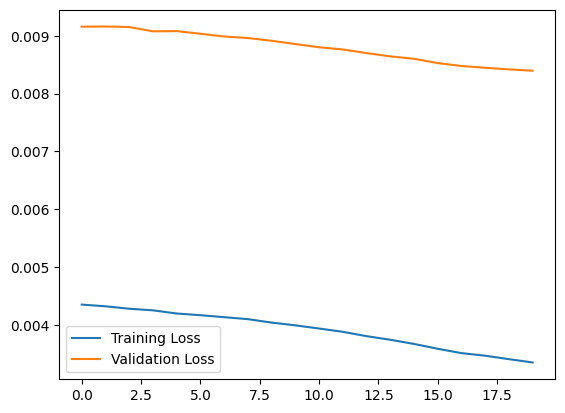

In [41]:
plt.plot(h.history["loss"], label="Training Loss")
plt.plot(h.history["val_loss"], label="Validation Loss")
plt.legend()


In [51]:
train_recons = autoencoder.predict(x_train_scaled)
train_recons_errors = tf.keras.losses.msle(x_train_scaled, train_recons)

threshold = train_recons_errors.numpy().mean() + 4*train_recons_errors.numpy().std()

print(f"threshold = {threshold}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
threshold = 0.021656099939718843


In [91]:
test_recons = autoencoder.predict(x_test_scaled)
test_recons_errors = tf.keras.losses.msle(x_test_scaled, test_recons)

anomaly_mask = pd.Series(test_recons_errors) > threshold
pred = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [92]:
accuracy_score(pred,y_test)

0.616

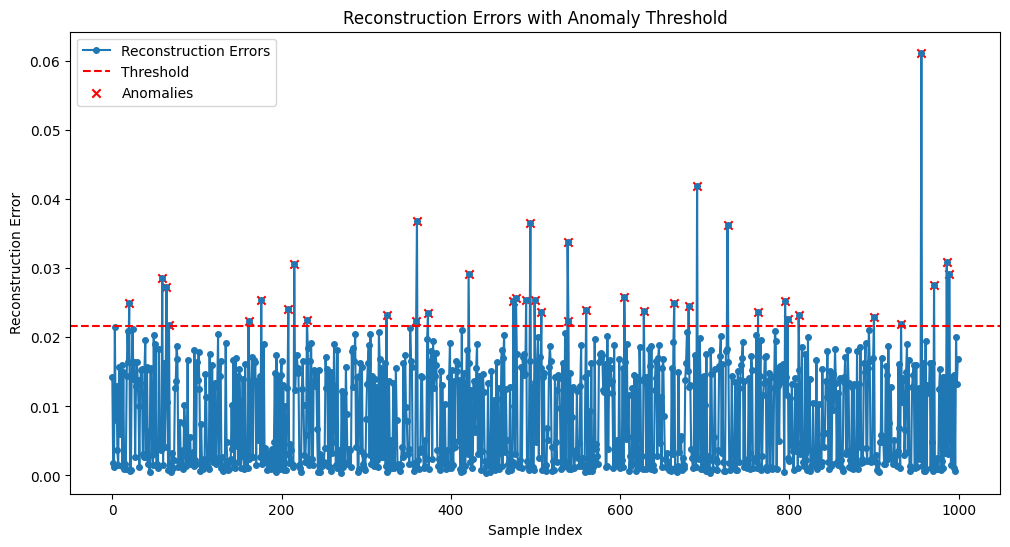

In [93]:
import matplotlib.pyplot as plt

# Convert reconstruction errors to numpy array
test_recons_errors_np = test_recons_errors.numpy()

# Plot reconstruction errors
plt.figure(figsize=(12, 6))
plt.plot(test_recons_errors_np, label='Reconstruction Errors', marker='o', linestyle='-', markersize=4)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')  # Plot threshold line

# Mark anomalies
anomaly_indices = np.where(test_recons_errors_np > threshold)[0]
plt.scatter(anomaly_indices, test_recons_errors_np[anomaly_indices], color='red', label='Anomalies', marker='x')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors with Anomaly Threshold')
plt.legend()
plt.show()
